In [1]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"cement.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     96 non-null     object 
 1   month                    96 non-null     int64  
 2   GDP_Construction_Rs_Crs  96 non-null     int64  
 3   GDP_Real Estate_Rs_Crs   96 non-null     int64  
 4   Oveall_GDP_Growth%       96 non-null     float64
 5   water_source             96 non-null     float64
 6   limestone                96 non-null     float64
 7   Coal                     96 non-null     float64
 8   Home_Interest_Rate       96 non-null     float64
 9   Trasportation_Cost       96 non-null     float64
 10  Population               96 non-null     float64
 11  demand                   96 non-null     float64
 12  sale                     96 non-null     float64
 13  unit_price               96 non-null     float64
 14  Total_Price              96 

In [3]:
df.columns

Index(['date', 'month', 'GDP_Construction_Rs_Crs', 'GDP_Real Estate_Rs_Crs',
       'Oveall_GDP_Growth%', 'water_source', 'limestone', 'Coal',
       'Home_Interest_Rate', 'Trasportation_Cost', 'Population', 'demand',
       'sale', 'unit_price', 'Total_Price'],
      dtype='object')

In [4]:
df.drop(columns={'month', 'GDP_Construction_Rs_Crs', 'GDP_Real Estate_Rs_Crs',
       'Oveall_GDP_Growth%', 'water_source', 'limestone', 'Coal',
       'Home_Interest_Rate', 'Trasportation_Cost', 'Population',
       'unit_price', 'Total_Price'},inplace =True)

In [5]:
Train = df.head(85)
Test = df.tail(12)

In [6]:
df1 = pd.read_csv('test_arima.csv', index_col = 0)

Figure(640x480)


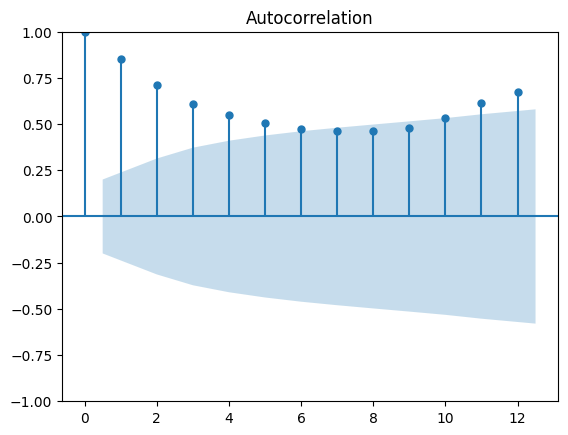

In [7]:
print(tsa_plots.plot_acf(df.sale, lags = 12))

Figure(640x480)


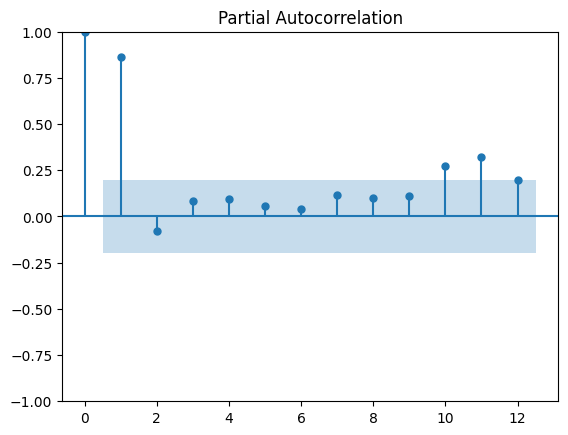

In [8]:
print(tsa_plots.plot_pacf(df.sale, lags = 12))

In [9]:
# ARIMA with AR = 12, MA = 5
model1 = ARIMA(Train.sale, order = (12, 1, 5))

In [10]:
res1 = model1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                   sale   No. Observations:                   85
Model:                ARIMA(12, 1, 5)   Log Likelihood                 -48.523
Date:                Sun, 19 Feb 2023   AIC                            133.045
Time:                        14:42:46   BIC                            176.800
Sample:                             0   HQIC                           150.634
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0398      0.164     -0.243      0.808      -0.362       0.282
ar.L2         -0.0749      0.145     -0.517      0.605      -0.359       0.209
ar.L3         -0.1637      0.162     -1.008      0.3

In [11]:
# Forecast for next 12 months
start_index = len(Train)
start_index
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)

In [12]:
print (forecast_test)

85    8.079501
86    7.094204
87    7.033490
88    7.072677
89    7.112026
90    5.749096
91    6.108207
92    6.602941
93    6.848466
94    7.010243
95    7.987221
96    8.792880
Name: predicted_mean, dtype: float64


In [13]:
# Evaluate forecasts
rmse_test = sqrt(mean_squared_error(Test.sale, forecast_test))
print('Test RMSE: %.3f' % rmse_test)

Test RMSE: 0.917


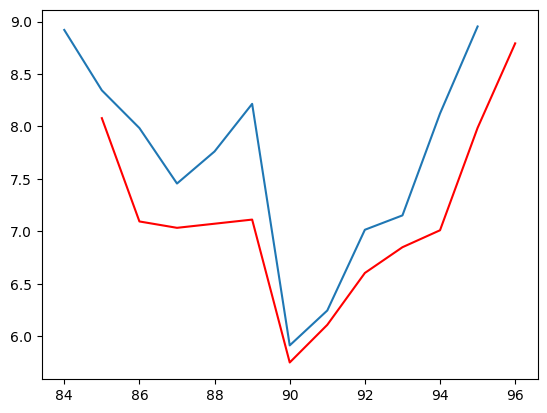

In [14]:
# plot forecasts against actual outcomes
pyplot.plot(Test.sale)
pyplot.plot(forecast_test, color = 'red')
pyplot.show()

In [15]:
import pmdarima as pm
from pmdarima import auto_arima

In [16]:
ar_model = pm.auto_arima(Train.sale, start_p = 0, start_q =0,
                      max_p =16 , max_q = 16, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 2, trace = True,
                      error_action = 'warn', stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=205.095, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=206.916, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.869, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=203.441, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=208.781, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.160 seconds


In [17]:
stepwise_fit = auto_arima(df['sale'],trace = True,
                         suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=216.717, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=233.999, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=235.917, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=235.888, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=232.302, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=217.876, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.930 seconds


In [18]:
model = ARIMA(Train.sale, order = (2,1,2))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   sale   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -91.529
Date:                Sun, 19 Feb 2023   AIC                            193.058
Time:                        14:42:50   BIC                            205.212
Sample:                             0   HQIC                           197.944
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6051      0.114     14.076      0.000       1.382       1.829
ar.L2         -0.8264      0.082    -10.105      0.000      -0.987      -0.666
ma.L1         -1.7785      0.114    -15.571      0.0

In [19]:
# Forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_best = res.predict(start = start_index, end = end_index)

In [20]:
print(forecast_best)

85    8.725971
86    8.319361
87    7.827874
88    7.375000
89    7.054250
90    6.913661
91    6.953069
92    7.132507
93    7.387959
94    7.649705
95    7.858731
96    7.977937
Name: predicted_mean, dtype: float64


In [21]:
rmse_best = sqrt(mean_squared_error(Test.sale, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 0.680


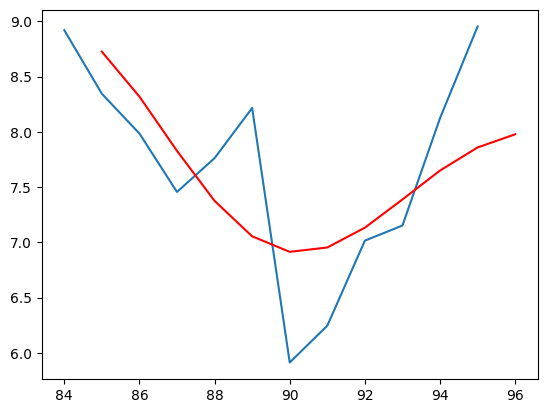

In [22]:
pyplot.plot(Test.sale)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()

In [23]:
print('Test RMSE with Auto-ARIMA: %.3f' % rmse_best)

Test RMSE with Auto-ARIMA: 0.680


In [24]:
print('Test RMSE with out Auto-ARIMA: %.3f' % rmse_test)

Test RMSE with out Auto-ARIMA: 0.917


In [25]:
res1.save("model.pickle")
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

In [26]:
start_index = len(df)
end_index = start_index + 11
forecast = model.predict(start = start_index, end = end_index)

In [27]:
print(forecast)

96     8.792880
97     8.049839
98     7.120757
99     7.057993
100    7.099851
101    6.988469
102    5.887813
103    6.225912
104    6.645103
105    6.883920
106    7.090209
107    7.955389
Name: predicted_mean, dtype: float64


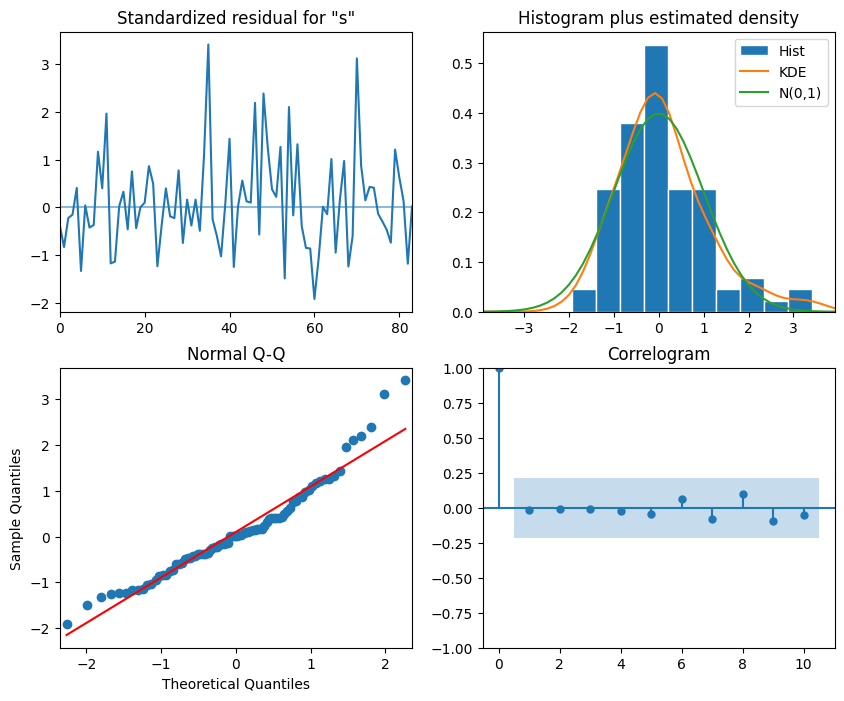

In [28]:
out = model.plot_diagnostics(figsize=(10,8))